In [2]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import glob
from pprint import pprint
from scripts.constants import COLUMNS_FOR_DATASET

In [4]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [5]:
ci_coverage_files = glob.glob(os.path.join(RESULTS_FOLDER, 'ci_coverage_napsu_discretized_*.csv'))

In [6]:
pprint(ci_coverage_files)

['/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_high_discretization_80e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_low_discretization_30e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_low_discretization_10e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_high_discretization_01e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_low_discretization_80e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_high_discretization_03e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_high_discretization_30e_empty.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_discretized_model_adult_low_discretization_01e_empty.csv',
 '/home/loca

In [74]:
df = pd.read_csv(ci_coverage_files[0])
df

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,discretization,experiment_id,epsilon
0,adult_high_discretization,0,100,0.05,9.131802e-02,9.372076e-02,2.402741e-03,0.130312,False,high,TRA1MZ9H,8.0
1,adult_high_discretization,0,100,0.05,-3.854870e-01,-3.840695e-01,1.417531e-03,-0.472646,False,high,TRA1MZ9H,8.0
2,adult_high_discretization,0,100,0.05,5.637330e-02,5.676334e-02,3.900390e-04,0.047235,False,high,TRA1MZ9H,8.0
3,adult_high_discretization,0,100,0.05,-9.337843e-01,-9.312320e-01,2.552290e-03,-0.934658,False,high,TRA1MZ9H,8.0
4,adult_high_discretization,0,100,0.05,3.011809e-01,3.034698e-01,2.288946e-03,0.524744,False,high,TRA1MZ9H,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7595,adult_high_discretization,49,100,0.95,-9.693559e-01,-8.932618e-01,7.609412e-02,-0.934658,True,high,TRA1MZ9H,8.0
7596,adult_high_discretization,49,100,0.95,2.501094e-01,3.622001e-01,1.120907e-01,0.524744,False,high,TRA1MZ9H,8.0
7597,adult_high_discretization,49,100,0.95,-1.744592e+18,1.744592e+18,3.489185e+18,0.599168,True,high,TRA1MZ9H,8.0
7598,adult_high_discretization,49,100,0.95,1.557487e+00,1.776880e+00,2.193932e-01,1.720929,True,high,TRA1MZ9H,8.0


In [144]:
df_combined = pd.DataFrame()

for file in sorted(ci_coverage_files):
    df = pd.read_csv(file)
    df_combined = df_combined.append(df)
    
df_combined = df_combined.round({'conf_int_range': 2, 'epsilon': 1})

/tmp/ipykernel_1002829/2675121988.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_1002829/2675121988.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_1002829/2675121988.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_1002829/2675121988.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_1002829/2675121988.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [145]:
len(df_combined)

76000

In [146]:
#df_combined = df_combined[df_combined['conf_int_width'] < 1000]

In [147]:
df_combined.tail(n=20)

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,discretization,experiment_id,epsilon
7580,adult_low_discretization,49,100,0.85,0.222957,0.303205,0.080248,0.467742,False,low,R3B8OC56,8.0
7581,adult_low_discretization,49,100,0.85,0.262933,0.308941,0.046008,0.143678,False,low,R3B8OC56,8.0
7582,adult_low_discretization,49,100,0.85,1.615459,1.755049,0.139590,1.698289,True,low,R3B8OC56,8.0
7583,adult_low_discretization,49,100,0.85,0.989809,1.186017,0.196207,1.205756,False,low,R3B8OC56,8.0
7584,adult_low_discretization,49,100,0.90,-0.086188,-0.032489,0.053699,0.156289,False,low,R3B8OC56,8.0
7585,adult_low_discretization,49,100,0.90,-0.471155,-0.426411,0.044744,-0.499904,False,low,R3B8OC56,8.0
7586,adult_low_discretization,49,100,0.90,0.036708,0.050383,0.013675,0.027596,False,low,R3B8OC56,8.0
7587,adult_low_discretization,49,100,0.90,-1.015822,-0.946176,0.069646,-0.908055,False,low,R3B8OC56,8.0
7588,adult_low_discretization,49,100,0.90,0.234415,0.310828,0.076412,0.467742,False,low,R3B8OC56,8.0
7589,adult_low_discretization,49,100,0.90,0.260407,0.317049,0.056642,0.143678,False,low,R3B8OC56,8.0


In [148]:
adult_low_discretization = df_combined[df_combined['original_dataset_name'] == 'adult_low_discretization']

In [149]:
adult_low_discretization['parameter_index'] = adult_low_discretization.groupby(['true_parameter_value'], sort=False).ngroup() + 1

/tmp/ipykernel_1002829/771101114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_low_discretization['parameter_index'] = adult_low_discretization.groupby(['true_parameter_value'], sort=False).ngroup() + 1


In [150]:
adult_low_discretization.head(n=80)

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,discretization,experiment_id,epsilon,parameter_index
0,adult_low_discretization,0,100,0.05,-0.075613,-0.064230,0.011383,0.156289,False,low,L5Q8DJE2,0.1,1
1,adult_low_discretization,0,100,0.05,-0.268604,-0.255983,0.012621,-0.499904,False,low,L5Q8DJE2,0.1,2
2,adult_low_discretization,0,100,0.05,0.086834,0.092881,0.006046,0.027596,False,low,L5Q8DJE2,0.1,3
3,adult_low_discretization,0,100,0.05,-1.242941,-1.207746,0.035195,-0.908055,False,low,L5Q8DJE2,0.1,4
4,adult_low_discretization,0,100,0.05,0.584944,0.611388,0.026444,0.467742,False,low,L5Q8DJE2,0.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,adult_low_discretization,0,100,0.50,-1.416305,-1.056523,0.359782,-0.908055,False,low,L5Q8DJE2,0.1,4
76,adult_low_discretization,0,100,0.50,0.431339,0.750594,0.319254,0.467742,True,low,L5Q8DJE2,0.1,5
77,adult_low_discretization,0,100,0.50,-0.339317,-0.181676,0.157641,0.143678,False,low,L5Q8DJE2,0.1,6
78,adult_low_discretization,0,100,0.50,1.303435,1.636119,0.332684,1.698289,False,low,L5Q8DJE2,0.1,7


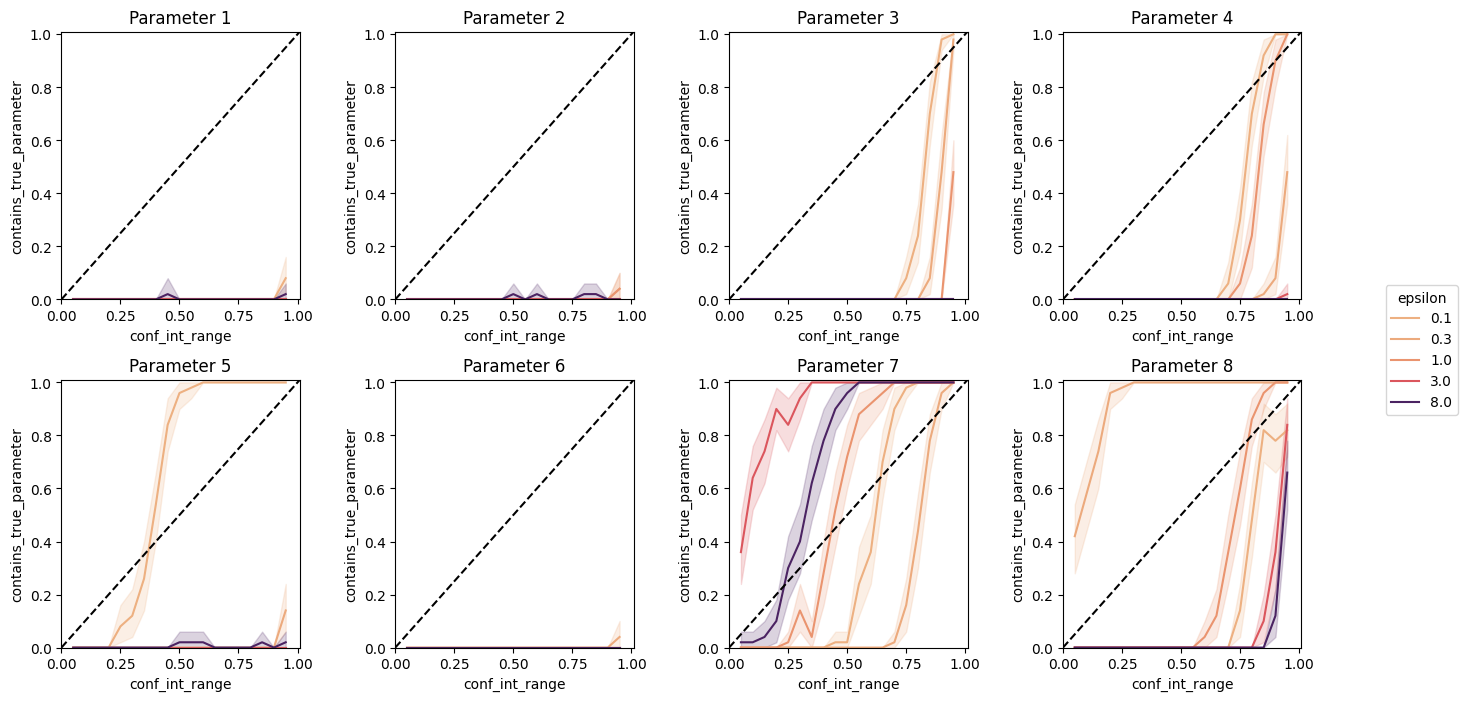

In [151]:
original_dataset_name = adult_low_discretization['original_dataset_name'].iloc[0]

dims = len(COLUMNS_FOR_DATASET[original_dataset_name])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
lines = []
labels = [0.1, 0.3, 1.0, 3.0, 8.0]

for param_index, ax in zip(list(range(1, 9)), axes.ravel()):
    df = adult_low_discretization[adult_low_discretization['parameter_index'] == param_index]
    g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", hue="epsilon", data=df, ax=ax, palette="flare", legend=None)
    diag = (0.0, 1.01)
    ax.plot(diag, diag, linestyle="dashed", color="black")
    ax.set_xlim(diag)
    ax.set_ylim(diag)
    ax.set_title(f"Parameter {param_index}")
    lines.exte nd(g.lines)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
fig.legend(lines, labels, title="epsilon", loc='center right')
plt.show()

In [152]:
adult_high_discretization = df_combined[df_combined['original_dataset_name'] == 'adult_high_discretization']

In [153]:
adult_high_discretization['parameter_index'] = adult_high_discretization.groupby(['true_parameter_value'], sort=False).ngroup() + 1

/tmp/ipykernel_1002829/3244062015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_high_discretization['parameter_index'] = adult_high_discretization.groupby(['true_parameter_value'], sort=False).ngroup() + 1


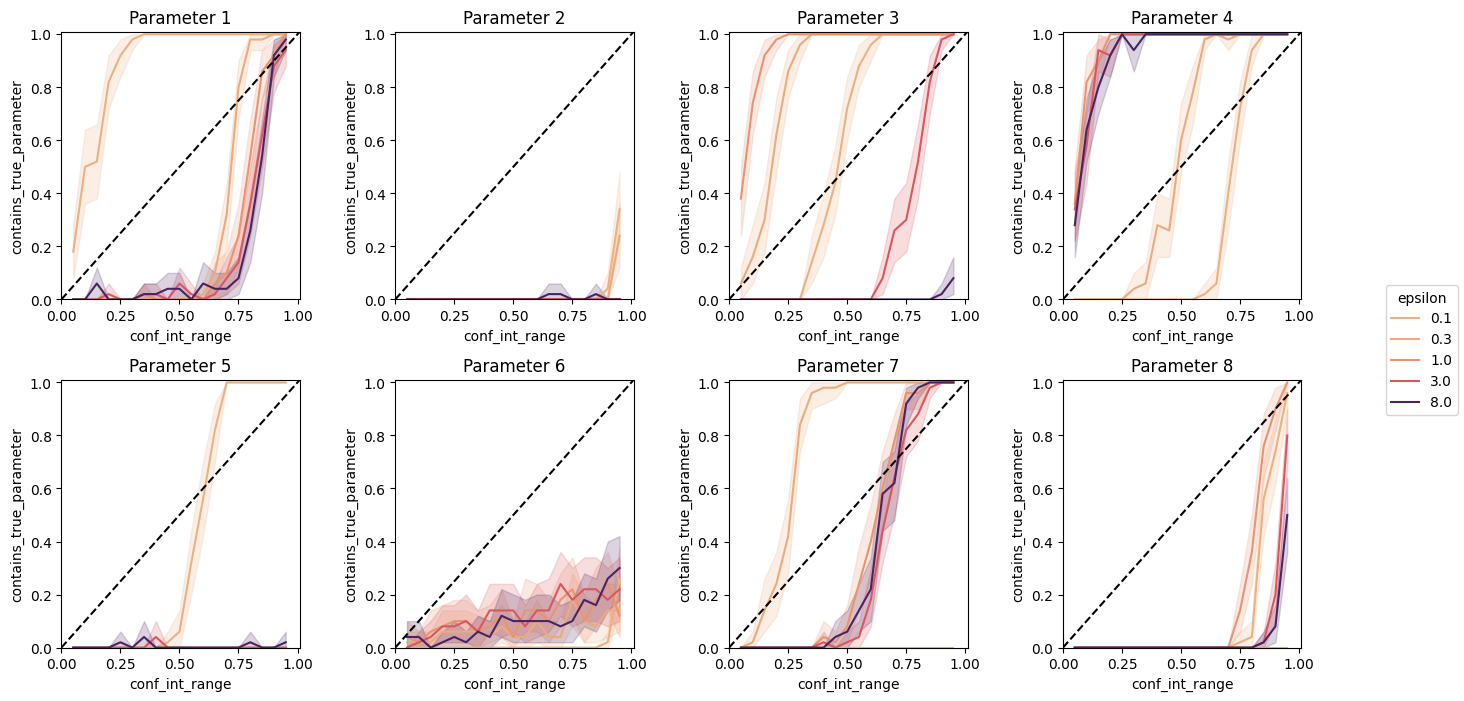

In [154]:
original_dataset_name = adult_high_discretization['original_dataset_name'].iloc[0]

dims = len(COLUMNS_FOR_DATASET[original_dataset_name])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
lines = []
labels = [0.1, 0.3, 1.0, 3.0, 8.0]

for param_index, ax in zip(list(range(1, 9)), axes.ravel()):
    df = adult_high_discretization[adult_high_discretization['parameter_index'] == param_index]
    g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", hue="epsilon", data=df, ax=ax, palette="flare", legend=None)
    diag = (0.0, 1.01)
    ax.plot(diag, diag, linestyle="dashed", color="black")
    ax.set_xlim(diag)
    ax.set_ylim(diag)
    ax.set_title(f"Parameter {param_index}")
    lines.extend(g.lines)

plt.subplots_adjust(wspace=0.4, hspace=0.3)
fig.legend(lines, labels, title="epsilon", loc='center right')
plt.show()

In [143]:
is_eps = (adult_high_discretization['epsilon'] == 8.0)
is_param = (adult_high_discretization['parameter_index'] == 1)
is_ci = (adult_high_discretization['conf_int_range'] == 0.75)
is_true = (adult_high_discretization['contains_true_parameter'] == True)
is_false = (adult_high_discretization['contains_true_parameter'] == False)

true_vals = len(adult_high_discretization[is_eps & is_param & is_ci & is_true])
false_vals = len(adult_high_discretization[is_eps & is_param & is_ci & is_false])

print(true_vals / (true_vals + false_vals))

0.0625
